In [ ]:
# 연습문제 05.02

연습문제 5.2.3
연습문제 5.2.4 ( 07. 최적화기초_선형계획법_집합_20191028_03 30분 ~ )
5.3.7 예제 -> 수기 + 코드(scipy, CVXPY 모두)
연습문제 5.3.1 -> 이차형식 리마인드. SVM에서 사용된다니.. 꼭 손으로 다시 해보기
연습문제 6.1.1 -> itertools 패키지 (데이터분석 시의 노가다를 해결해줄 것)




In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.decomposition import PCA
import sympy

In [ ]:
05.02 제한조건이 있는 최적화 문제

3) 라그랑지 승수법 (라그랑지 승수 = 람다)

    0) 제한식 = 0 꼴로 다듬기 (gi(x) = 0)
    1) 등식 제한조건에 람다를 붙여 새로운 목적함수 생성
    2) 기존 변수(x들)와 람다변수들 모두의 그레디언트벡터 = 0 으로 하는 xi*, 람다i*를 찾는다. (최적해)
        *람다i = 0 이라면, 해당 제한등식(gi(x))는 무의미한 제한식

* 라그랑지 승수(람다)의 의미
    : 제한조건이 의미가 있으려면 람다는 0이 아니다. 
      (제한조건 유무에 관계없이 해가 같다면, 람다=0, 제한조건 없이 그냥 최적화 진행과 같음)
      (람다=0 일때만 등식이 있을 때와 없을 때의 최적해가 같아짐)
        

4) 부등식 제한조건
    - 제한조건인 부등식은 g(x)<= 0 으로 부등호 방향이 되도록 해야함
    - 라그랑지 승수법을 적용해 새로운 목적함수 만들어 최적화 실시. 단 KKT 조건을 만족해야 최적해 찾을 수 있음
    - KKT 조건 (05.02 7page)
        1) 다변수에 대한 미분 값 = 0
            <=> x로 미분한 값 = 0
        2) 라그랑지 승수에 대한 미분값 = 0 or 라그랑지 승수 = 0 (05.02 9page)
            <=> 람다 = 0 or 람다로 미분한 값 = 0
        3) 라그랑지 승수 >= 0
            <=> 람다 >= 0

    
    con) 람다 = 0 이면, 제한조건 없는 상태(제한조건 선과 관련 없이)에서의 최적해 찾을 것이고, 
         람다 != 0 이라면, 등식 제한조건(제한조건 선 위에서)에서 최적해를 찾을 것이다.
        
        
    
    
05.03 선형계획법 문제와 이차계획법 문제

    - 05.01 : 최초 목적함수만 주어졌을 때의 최적화
    - 05.02 : 제한조건이 추가되었을 때의 최적화 (등식, 부등식)
    - 05.03 : 목적함수, 제한조건이 특정한 경우의 최적화 (선형계획법 문제, 2차계획법 문제)

1) 선형계획법 문제(Linear programming 문제, LP문제)
    - 목적함수가 선형함수 인 경우 = 목적함수가 w.Tx 로 계수와 변수를 선형결합 시켜 스칼라 값을 갖는 경우 (5.3.1)
        1) 표준형
            - 제한조건 2개
                Ax = b   *A = 등식 제한조건 계수행렬, b = 등식 제한조건 상수 벡터
                x >= 0
        
        2) 정규형
            - 제한조건 2개
                Ax <= b
                x >= 0
                
    
    - 최적 생산량 예제 (최적화 중 LP문제)
    
    - 해결 방법 : scipy 활용 코드 / CVXPY 활용 코드(직관적이나 속도 느림)
        
        
        
2) 2차계획법 문제(Quadratic programming 문제, QD문제)
    - LP 문제 목적함수에 이차형식만 추가됨 (5.3.13)
    
    - 해결 방법 : CVXOPT 

In [ ]:
06.01 집합

1) 집합과 원소
    - mutable : 객체 메모리 내용 변경 가능. set이 품음. (list, dict(key)나 set 자료형의 원소로 사용 불가. (06.01 1page)
    - immutable : 내용 변경 불가. frozenset이 품음. (int, float, str, tuple)
        
                                           
                                           
                                           
2) 집합의 크기 : Cardinality
    - Cardinality : 원소의 갯수 (len(A) 로 알 수 있음)
        
3) 합집합과 교집합
    - 합집합 : A.union(A2), A|A2
    - 교집합 : A.intersection(A2), A&A2
    
4) 부분집합
    - A.issubset(A2), A<=A2 : A가 A2의 부분집합인지 확인
    - A < A2 : A가 진부분집합인지 확인 (진부분집합 : A<B 이지만, A!=B 일 때)
    
5) 차집합, 여집합
    - A - A2, A.difference(A2)

6) 공집합
    - A = set([])
    
    
7) 부분집합의 수
    - 2**n 개
    
    
8) set은 set의 원소가 될 수 없음. frozenset만 set의 원소가 될 수 있음


        

In [9]:
# 연습문제 5.2.4

def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 0.1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.382922108746309
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11


array([9.99983654e-02, 1.63456102e-06])

Font 'default' does not have a glyph for '\uc81c' [U+c81c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud55c' [U+d55c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc870' [U+c870], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac74' [U+ac74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc744' [U+c744], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c0' [U+c9c0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub294' [U+b294], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucd5c' [U+cd5c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc801' [U+c801], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], 

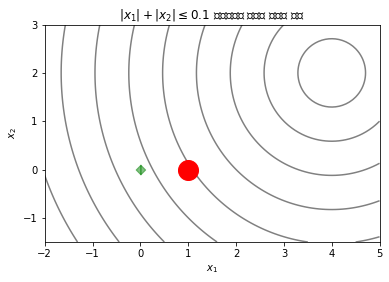

In [13]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)


x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

# 제한 조건의 상수
k = 0.1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

# 최적점 위치
x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.show()

In [16]:
# 선형계획법 문제 계산 (scipy 활용)

import scipy.optimize

c = np.array([-3, -5])
b = np.array([-100,-100,500,9800])
A = np.array([[-1,0],[0,-1],[1,2],[4,5]])

result = sp.optimize.linprog(c,A,b)
result

     con: array([], dtype=float64)
     fun: -1399.9999948073846
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([1.99999991e+02, 4.19920389e-06, 3.31137130e-07, 8.10000001e+03])
  status: 0
 success: True
       x: array([299.99999127, 100.0000042 ])

In [ ]:
conda install cvxopt

In [3]:
pip install cvxpy

     |████████████████████████████████| 747kB 65kB/s eta 0:00:013
     |████████████████████████████████| 3.6MB 46kB/s eta 0:00:010     |████████████████████████▋       | 2.7MB 49kB/s eta 0:00:17
     |████████████████████████████████| 163kB 36kB/s eta 0:00:01
     |████████████████████████████████| 133kB 37kB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 37kB/s eta 0:00:015
     |████████████████████████████████| 153kB 50kB/s eta 0:00:01
  Created wheel for scs: filename=scs-2.1.2-cp37-cp37m-macosx_10_9_x86_64.whl size=124433 sha256=718d6f23067e7d65c701389aceb9f5a87579974e0d7ee4a93dbc3450dc1041a7
  Stored in directory: /Users/kimjeongseob/Library/Caches/pip/wheels/df/d0/79/37ea880586da03c620ca9ecd5e42adbd86bc6ea84363965c5f
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp37-cp37m-macosx_10_9_x86_64.whl size=72422 sha256=70f4122382679bc08737ab7e6ce35a21b8c5732112edfa92abb1a93c732e29c7
  Stored in directory: /Users/kimjeongseob/Library/Caches/pip/wheels/4b/7d/90/39ff7

In [4]:
# 선형계획법 문제 계산 (Cvxpy 활용)

import cvxpy as cp

# 변수의 정의
a = cp.Variable() # A 생산량
b = cp.Variable() # B 생산량

# 조건의 정의
constraints = [
    a >= 100,
    b >= 100,
    a+4*b <= 500,
    4*a+5*b <= 9800,
]

# 문제의 정의
obj = cp.Maximize(3*a+5*b)
prob = cp.Problem(obj, constraints)

# 계산
prob.solve()

# 결과
print("상태:",prob.status)
print("최적값:",a.value,b.value)

상태: optimal
최적값: 99.99999985631587 100.0000002233542


In [8]:
# 이차계획법 문제 계산 (CvxOpt)

from cvxopt import matrix, solvers

Q = matrix(np.diag([2.0, 2.0]))
c = matrix(np.array([0.0, 0.0]))
A = matrix(np.array([[1.0, 1.0]]))
b = matrix(np.array([[1.0]]))

sol = solvers.qp(Q, c, A=A, b=b)
np.array(sol['x'])

array([[0.5],
       [0.5]])